# Curva de capacidade

Corrente de Armadura (I_a): 2091.96 A ∠ -25.84° A
Tensão de Armadura (E_a): 11546.61 A ∠ 23.07° V
Q = -76.17 MVAr
D_E = 110.39 MVA


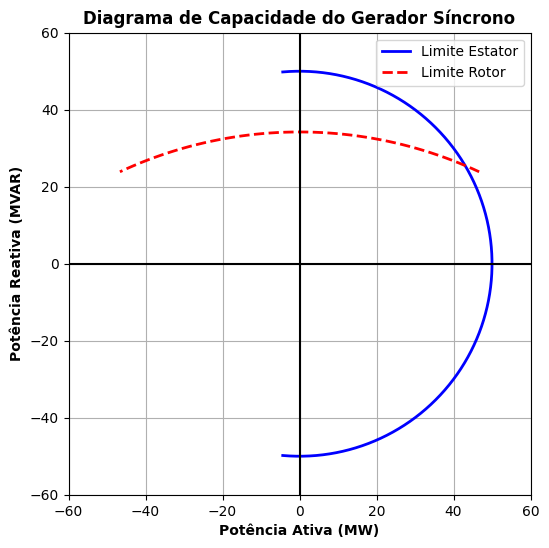

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# @brief:
# @params:
#   - V_phi: Tensão de fase nominal [kV]
#   - X_s: Reatância Síncrona       [Ω]
#   - R_a: Resistência de armadura  [Ω]
#   - S_rated: Potência aparente nominal [MVA]
#   - fp: fator de potência

def GetCapabilityCurve(V_phi, X_s, R_a, S_rated, fp):
    Theta = np.acos(fp)
    # Corrente de armadura (I_s)
    I = S_rated * 1e6 /(3* V_phi * 1e3)
    I_a = I * (np.cos(Theta) - 1j * np.sin(Theta))

    # Tensão de armadura (E_a)
    E_a = V_phi * 1e3 + (I_a * (R_a +  1j * X_s))

    print(f"Corrente de Armadura (I_a): {abs(I_a):.2f} A ∠ {np.degrees(np.angle(I_a)):.2f}° A")
    print(f"Tensão de Armadura (E_a): {abs(E_a):.2f} A ∠ {np.degrees(np.angle(E_a)):.2f}° V")

    Q = -3 * V_phi**2 / X_s
    print(f"Q = {Q:.2f} MVAr")

    # Limite da corrente do estator
    theta_s = np.radians(np.arange(-95, 96, 1))
    s_curve = S_rated * (np.cos(theta_s) + 1j * np.sin(theta_s))

    # Limite da corrente do rotor
    D_E = (3 * V_phi * 1e3 * abs(E_a) / X_s) / 1e6
    print(f"D_E = {D_E:.2f} MVA")

    theta_r = np.radians(np.arange(65, 116, 1))
    r_curve = 1j * Q + D_E * (np.cos(theta_r) + 1j * np.sin(theta_r))

    # Plot
    plt.figure(figsize=(6,6))
    plt.plot(np.real(s_curve), np.imag(s_curve), 'b', linewidth=2.0, label='Limite Estator')
    plt.plot(np.real(r_curve), np.imag(r_curve), 'r--', linewidth=2.0, label='Limite Rotor')

    plt.axhline(0, color='k')
    plt.axvline(0, color='k')

    plt.title('Diagrama de Capacidade do Gerador Síncrono', fontsize=12, fontweight='bold')
    plt.xlabel('Potência Ativa (MW)', fontsize=10, fontweight='bold')
    plt.ylabel('Potência Reativa (MVAR)', fontsize=10, fontweight='bold')
    plt.axis([-1.2*S_rated, 1.2*S_rated, -1.2*S_rated, 1.2*S_rated])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplo de uso
GetCapabilityCurve(V_phi=7.967, X_s=2.5, R_a=0.2, S_rated=50, fp=0.9)
